In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install evaluate
!pip install accelerate -U
!pip install datasets
!git clone https://github.com/huggingface/transformers.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
import zipfile
import os


zip_file_name = '/content/NLI_Dataset.zip'


drive_folder = '/content/data'


with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/data')


extracted_folder = '/content/data'
for file in os.listdir(extracted_folder):
    full_path = os.path.join(extracted_folder, file)
    destination_path = os.path.join(drive_folder, file)
    os.rename(full_path, destination_path)

In [ ]:
!python '/content/transformers/examples/pytorch/text-classification/run_glue.py' \
  --model_name_or_path google-bert/bert-base-cased \
  --dataset_name imdb  \
  --do_train \
  --do_predict \
  --max_seq_length 128 \
  --per_device_train_batch_size 32 \
  --learning_rate 1e-4 \
  --num_train_epochs 1 \
  --output_dir '/content/drive/MyDrive/NLI_Folder'

2024-04-04 19:06:18.401486: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-04 19:06:18.401552: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-04 19:06:18.537488: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-04 19:06:20.230340: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
04/04/2024 19:06:25 - WARNING - __main__ - Process rank: 0, device: cuda:0, n_gpu: 1, distributed training: False, 16-bits training: False
04/04/2024 19:06:25 - INFO - __main__ - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
ac

In [ ]:
# export TASK_NAME=mrpc

!python '/content/transformers/examples/pytorch/text-classification/run_glue_no_trainer.py' \
  --model_name_or_path '/content/drive/MyDrive/NLI_Folder/checkpoint-500' \
  --task_name 'sst2' \
  --train_file '/content/data/Train.csv' \
  --validation_file '/content/data/Valid.csv' \
  --max_length 128 \
  --per_device_train_batch_size 32 \
  --learning_rate 1e-4 \
  --num_train_epochs 2 \
  --output_dir '/content/drive/MyDrive/NLI_Folder'

2024-04-04 19:26:14.058212: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-04 19:26:14.058282: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-04 19:26:14.060273: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-04 19:26:15.924410: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
04/04/2024 19:26:21 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

Generating train split: 100% 67349/67349 [00:00<00:00, 1244382.00 examples/s

In [ ]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer

# Load the saved model
model_path = '/content/drive/MyDrive/NLI_Folder/checkpoint-500'  # Path where the model is saved
model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer = BertTokenizer.from_pretrained(model_path)

# Load the test dataset
test_dataset_path = '/content/data/Test.csv'  # Path to the test dataset
# Load the dataset into a pandas DataFrame or any suitable data structure
test_df = pd.read_csv(test_dataset_path)

# Select a single document from the test dataset
# document_index = 2 # Index of the document you want to evaluate
document = test_df.iloc[8]['text']

# Tokenize the single document
tokenized_document = tokenizer(document, padding='max_length', truncation=True, max_length=128, return_tensors="pt")

# Prepare input tensors
input_ids = tokenized_document['input_ids']
attention_masks = tokenized_document['attention_mask']

# Perform inference
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_masks)

# Get predicted label
predicted_label = torch.argmax(outputs.logits, dim=1).item()

# Map predicted label to class
# Here, you may have to define a mapping between predicted labels and their corresponding classes.
# For example, if the model outputs 0 for negative sentiment and 1 for positive sentiment:
label_mapping = {0: 'Negative', 1: 'Positive'}
predicted_class = label_mapping[predicted_label]

print("Predicted sentiment:", predicted_class)


Predicted sentiment: Negative


In [ ]:
import pandas as pd
import torch
from transformers import BertForSequenceClassification, BertTokenizer

# Load the saved model
model_path = '/content/drive/MyDrive/NLI_Folder/checkpoint-500'  # Path where the model is saved
model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer = BertTokenizer.from_pretrained(model_path)

# Load the test dataset
test_dataset_path = '/content/Test.csv'  # Path to the test dataset
test_df = pd.read_csv(test_dataset_path)

# Prepare lists to store predicted labels
predicted_labels = []

# Iterate over test dataset
for index, row in test_df.iterrows():
    # Tokenize the document
    tokenized_text = tokenizer(row['text'], padding='max_length', truncation=True, max_length=128, return_tensors="pt")

    # Prepare input tensors
    input_ids = tokenized_text['input_ids']
    attention_masks = tokenized_text['attention_mask']

    # Perform inference
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_masks)

    # Get predicted label
    predicted_label = torch.argmax(outputs.logits, dim=1).item()

    # Append predicted label to list
    predicted_labels.append(predicted_label)

# Add predicted labels to the test dataset
test_df['predicted_values'] = predicted_labels

# Save the updated test dataset with predicted labels
test_df.to_csv('/content/Test.csv', index=False)

print("Predicted values saved to 'Test_with_predictions.csv'")


Predicted values saved to 'Test_with_predictions.csv'


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Test.csv')

In [ ]:
df

,text,label,predicted_values
0,I always wrote this series off as being a comp...,0,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,0
2,This movie was so poorly written and directed ...,0,0
3,The most interesting thing about Miryang (Secr...,1,1
4,"when i first read about ""berlin am meer"" i did...",0,0
...,...,...,...
4995,This is the kind of picture John Lassiter woul...,1,1
4996,A MUST SEE! I saw WHIPPED at a press screening...,1,1
4997,NBC should be ashamed. I wouldn't allow my chi...,0,0
4998,This movie is a clumsy mishmash of various gho...,0,0


In [ ]:
true_labels = test_df['label']  # Replace 'label_column' with the actual column name containing true labels
predicted_labels = test_df['predicted_values']
accuracy = accuracy_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)

Accuracy: 0.8846


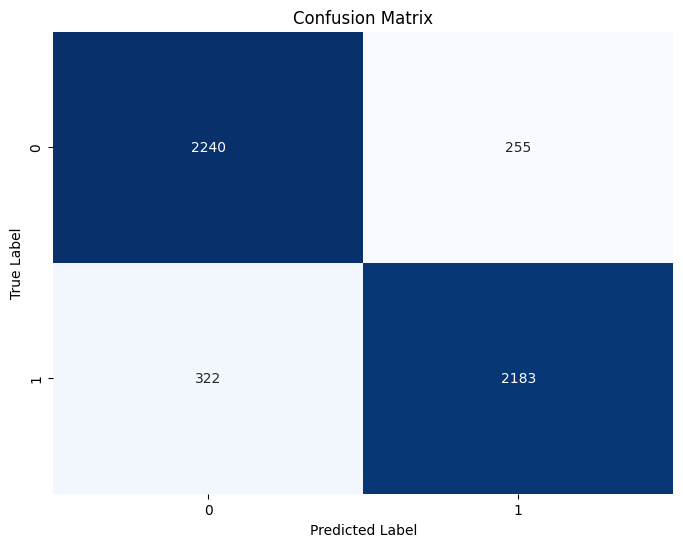

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()